<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### LASSO Regression

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Machine Learning in Python: a Hands-on Guide with Code, https://geostatsguy.github.io/MachineLearningDemos_Book. 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository (0.0.1). Zenodo. [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **LASSO Regression**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Linear Regression](https://youtu.be/0fzbyhWiP84)
* [Ridge Regression](https://youtu.be/pMGO40yXZ5Y?si=ygJAheyX-v2BmSiR)
* [LASSO Regression](https://youtu.be/cVFYhlCCI_8?si=NbwIDaZj30vxezn2)
* [Norms](https://youtu.be/JmxGlrurQp0?si=vuF1TXDbZkyRC1j-)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for LASSO Regression

Here's a simple workflow, demonstration of ridge regression and comparison to linear regression and ridge regression for machine learning-based predictions. Why start with linear regression?

* Linear regression is the simplest parametric predictive machine learning model
* We learn about training machine learning models with an iterative approach, with LASSO we loose the analytical solution of linear and ridge regression
* Get's us started with the concepts of loss functions and norms
* We have access to analytics expressions for confidence intervals for model uncertainty and hypothesis tests for parameter significance

Why also cover ridge regression before LASSO regression?

* Some times linear regression is not simple enough and we actually need a simpler model! 
* Introduce the concept of model regularization and hyperparameter tuning

Then we cover LASSO regression to learn about the impact of choice of loss function norm on training machine learning models.

* With LASSO regression we replace the L2 regularization term in the ridge regression loss function with L1 regularization
* As a result LASSO sequentially shrinks the model parameters to 0.0, resulting in a built in feature selection! 
  
Here's some basic details about predictive machine learning LASSO regression models, let's start with linear regression and ridge regression first and build to ridge regression: 

#### Linear Regression

Linear regression for prediction, let's start by looking at a linear model fit to a set of data.

<figure style="text-align: center;">
  <img src="_static/LASSO/linear_example.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Example linear regression model.</figcaption>
</figure>

Let's start by defining some terms,

* **predictor feature** - an input feature for the prediction model, given we are only discussing linear regression and not multilinear regression we have only one predictor feature, $x$. On out plots (including above) the predictor feature is on the x-axis.

* **response feature** - the output feature for the prediction model, in this case, $y$. On our plots (including above) the response feature is on the y-axis.

Now, here are some key aspects of linear regression:

**Parametric Model**

This is a parametric predictive machine learning model, we accept an a prior assumption of linearity and then gain a very low parametric representation that is easy to train without a onerous amount of data.

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.
* the parametric model takes the form of: 

$$
y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0
$$

Here's the visualization of the linear model parameters,

<figure style="text-align: center;">
  <img src="_static/LASSO/linear_model.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">The linear model parameters.</figcaption>
</figure>

**Least Squares**

The analytical solution for the model parameters, $b_1,\ldots,b_m,b_0$, is available for the L2 norm loss function, the errors are summed and squared known a least squares.
* we minimize the error, residual sum of squares (RSS) over the training data: 

$$
RSS = \sum_{i=1}^n \left(y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha,i} + b_0) \right)^2
$$

where $y_i$ is the actual response feature values and $\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$ are the model predictions, over the $\alpha = 1,\ldots,n$ training data.

Here's a visualization of the L2 norm loss function, MSE,

<figure style="text-align: center;">
  <img src="_static/LASSO/linear_MSE.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">The linear model loss function, mean square error.</figcaption>
</figure>

* this may be simplified as the sum of square error over the training data, 

\begin{equation}
\sum_{i=1}^n (\Delta y_i)^2
\end{equation}

where $\Delta y_i$ is actual response feature observation $y_i$ minus the model prediction $\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$, over the $i = 1,\ldots,n$ training data.

**Assumptions**

There are important assumption with our linear regression model,
* **Error-free** - predictor variables are error free, not random variables

* **Linearity** - response is linear combination of feature(s)

* **Constant Variance** - error in response is constant over predictor(s) value

* **Independence of Error** - error in response are uncorrelated with each other

* **No multicollinearity** - none of the features are redundant with other features

#### Ridge Regression

With ridge regression we add a hyperparameter, $\lambda$, to our minimization, with a shrinkage penalty term, $\sum_{j=1}^m b_{\alpha}^2$.

$$
\sum_{i=1}^n \left(y_i - \left(\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha,i} + b_0 \right) \right)^2 + \lambda \sum_{j=1}^m b_{\alpha}^2
$$

As a result, ridge regression training integrates two and often competing goals to find the model parameters, 

* find the model parameters that minimize the error with training data
  
* minimize the slope parameters towards zero

Note: lambda does not include the intercept, $b_0$.

The $\lambda$ is a hyperparameter that controls the degree of fit of the model and may be related to the model bias-variance trade-off.

* for $\lambda \rightarrow 0$ the solution approaches linear regression, there is no bias (relative to a linear model fit), but the model variance is likely higher
  
* as $\lambda$ increases the model variance decreases and the model bias increases, the model becomes simpler
  
* for $\lambda \rightarrow \infty$ the model parameters $b_1,\ldots,b_m$ shrink to 0.0 and the model predictions approaches the training data response feature mean

#### LASSO Regression

For LASSO, similar to ridge regression, we add a hyperparameter $\lambda$ to our minimization, with a shrinkage penalty term, but we use the L1 norm instead of L2 (sum of absolute values instead of sum of squares).

$$
\sum_{i=1}^n \left(y_i - \left(\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha,i} + b_0 \right) \right)^2 + \lambda \sum_{j=1}^m |b_{\alpha}|
$$

As a result, LASSO regression training integrates two and often competing goals to find the model parameters, 

* find the model parameters that minimize the error with training data
* minimize the slope parameters towards zero

Once again, the only difference between LASSO and ridge regression is:

* for LASSO the shrinkage term is posed as an $\ell_1$ penalty,

$$
\lambda \sum_{\alpha=1}^m |b_{\alpha}|
$$

* for ridge regression the shrinkage term is posed as an $\ell_2$ penalty,

$$
\lambda \sum_{\alpha=1}^m \left(b_{\alpha}\right)^2
$$

While both ridge regression and LASSO shrink the model parameters ($b_{\alpha}, \alpha = 1,\ldots,m$) towards zero:

* LASSO parameters reach zero at different rates for each predictor feature as the lambda, $\lambda$, hyperparameter increases. 
* as a result LASSO provides a method for feature ranking and selection!

The lambda, $\lambda$, hyperparameter controls the degree of fit of the model and may be related to the model bias-variance trade-off.

* for $\lambda \rightarrow 0$ the prediction model approaches linear regression, there is lower model bias, but the model variance is higher
* as $\lambda$ increases the model variance decreases and the model bias increases
* for $\lambda \rightarrow \infty$ the coefficients all become 0.0 and the model is the training data response feature mean

#### **$L^1$ vs. $L^2$ Norm**

This would be a good time to discuss the choice of $L^1$ and $L^2$ norm. To explain this let's compare the performance of $L^1$ and $L^2$ norms in loss functions while training model parameters.

| Property                        | Least Absolute Deviations (L1) | Least Squares (L2)             |
|----------------------------------|---------------------------------|--------------------------------|
| **Robustness**                   | Robust                         | Not very robust                |
| **Solution Stability**           | Unstable solution              | Stable solution                |
| **Number of Solutions**          | Possibly multiple solutions    | Always one solution            |
| **Feature Selection**            | Built-in feature selection     | No feature selection           |
| **Output Sparsity**              | Sparse outputs                 | Non-sparse outputs             |
| **Analytical Solutions**         | No analytical solutions        | Analytical solutions           |

Here's some important points specifically for LASSO regression,

#### Feature Selection

Let’s compare the solutions from Ridge with $𝑳^𝟐$ and LASSO with $𝑳^𝟏$ regularization.

* for the same regularization cost we have different shapes in model parameter space

<figure style="text-align: center;">
  <img src="_static/LASSO/regularization_shape.png" style="display: block; margin: 0 auto; width: 85%;">
  <figcaption style="text-align: center;"> Iso-regularization loss contours for LASSO (left) and ridge (right) regression.</figcaption>
</figure>

* if $𝑠$ is large enough ($\lambda \rightarrow 0$), then the least squares fit of the parameters is selected, it exists in the space, $𝑠$!

Now consider the least squares estimates term along with the regularization term in the loss functions,

<figure style="text-align: center;">
  <img src="_static/LASSO/loss_shape.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Iso-square error and regularization loss contours for LASSO (left) and ridge (right) regression.</figcaption>
</figure>

* we can see that as we balance the regularization and square error loss terms, as $\lambda$ increases the model parameters traverse from least squares to 0, and due to the shape of the regularization term for LASSO the model parameters are more likely to shrink to 0.0

To help visualize the change in the trained model parameters for ridge vs. LASSO regression as $\lambda$ is changed, I built an interactive Python [Linear Solution Dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Linear_Solutions.ipynb).

<figure style="text-align: center;">
  <img src="_static/LASSO/interactive_solutions.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Interactive dashboard to visualize the square error and Shrinkage losses.</figcaption>
</figure>

We see that LASSO performs feature selection at the same time as prediction.

#### Numerical Solutions 

The $𝐿^1$ norm does not have analytical solutions because it is non-differentiable piece-wise function (includes an absolute value).

* with LASSO we must use a numerical solution, for example, iterative gradient descent solution instead of an analytical solution, e.g., linear and ridge regression

* Tibshirani (2012) demonstrated that the LASSO solution is unique for any number of features, 𝑚, given all features are continuous. Therefore, the loss function has a global minimum.

Recall the LASSO loss function,

$$
\sum_{i=1}^n \left(y_i - \left(\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha,i} + b_0 \right) \right)^2 + \lambda \sum_{j=1}^m |b_{\alpha}|
$$

We can illustrate the numerical solution for the model parameter $b_1$ with this example,

<figure style="text-align: center;">
  <img src="_static/LASSO/2solutions.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Training error for a medium slope (left) and low slope (right).</figcaption>
</figure>

Now we calculate many cases of $b_1$ and visualize the loss vs. model parameter plot,

<figure style="text-align: center;">
  <img src="_static/LASSO/lossplot.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> Loss vs \(b_1\) model parameter with low and medium cases highlighted.</figcaption>
</figure>

Finding the model parameters that minimize the loss function is numerical optimization.

* so we use common numerical optimization methods to train our machine learning models

#### Grid Search, Brute Force Optimization

We could try all the combinations of model parameters, with sufficient discretization, and keep the model parameter combination that minimizes the loss function,

* possible for a single model parameter

* impractical for most machines due to the large combinatorial of possible model parameter values

<figure style="text-align: center;">
  <img src="_static/LASSO/brute_force.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Model parameter grid search, brute force optimization, regular sampling of the loss function for 1 model parameter (above) and 2 model parameters (below).
.</figcaption>
</figure>

The combinatorial of model parameters is,

$$
𝑛_𝑐=𝑛_{𝑏𝑖𝑛𝑠}^{𝑛_𝑏}
$$

where $𝑛_𝑏$ is the number of model parameters and $𝑛_{𝑏𝑖𝑛𝑠}$ is the number of discretizations for each model parameters.

* the size of the space is even larger with Bayesian approaches where the model parameters are represented by distributions.

#### Gradient Descent Optimization

The gradient descent approach for numerical solutions proceeds as,

1. Start a random model parameter

2. Calculate the loss function

3. Calculate the loss function gradient, generally don’t have an equation for the loss function, sampling with numerical calculation of the local loss function derivative. 

$$
\nabla L(y_{\alpha}, F(X_{\alpha}, b_1)) = \frac{L(y_{\alpha}, F(X_{\alpha}, b_1 - \epsilon)) - L(y_{\alpha}, F(X_{\alpha}, b_1 + \epsilon))}{2\epsilon}
$$

4. Update the parameter estimate by stepping down slope / gradient

$$
\hat{b}_{1,t+1} = \hat{b}_{1,t} - r \nabla L(y_{\alpha}, F(X_{\alpha}, b_1))
$$

where $𝑟$ is the learning rate/step size, $\hat{b}_{1,𝑡}$, is the current model parameter estimate and $\hat{𝑏}_{1,𝑡+1}$ is the updated parameter estimate.

Gradient search convergence,
* gradient descent optimization will find a local or global minimum

Gradient search step size,
* $𝑟$ too small, takes too long to converge to a solution

* $𝑟$ too large, the solution may skip over/miss a global minimum or diverge

<figure style="text-align: center;">
  <img src="_static/LASSO/diverge.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Solution convergence (left) and divergence (right).</figcaption>
</figure>

Multivariate optimization, if models will have more than 1 model parameter,
* calculate and decompose the gradient over multiple model parameters, now with a vector representation of the gradient over all model parameters

* for example, with 2 model parameters,
  
$$
\nabla L(y_{\alpha}, F(X_{\alpha}, b_1, b_2)) = \left[ \begin{array}{c} \nabla L(y_{\alpha}, F(X_{\alpha}, b_1)) \\ \nabla L(y_{\alpha}, F(X_{\alpha}, b_2)) \end{array} \right]
$$

we can represent this graphically as,

<figure style="text-align: center;">
  <img src="_static/LASSO/vector.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Gradient descent for 2 model parameters through vector of representation of loss.</figcaption>
</figure>

* optimization for training machine learning models is exploration of a high dimensional model parameter space

Mitigation of Local Minimums

1. A common approach is multiple starts and take the best result.

<figure style="text-align: center;">
  <img src="_static/LASSO/mitigate_local.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> Multiple random starts to improve identification of global minimum.</figcaption>
</figure>

2. Start with larger learning rate, step size, reduce steps over $𝑡=1,\dots,𝑇$, for search and then converge.
* use of a step size schedule / adaptive step size over iterations, for example, Adam optimizer commonly used for Artificial Neural Networks. 

* simulated annealing has a schedule of probability to accept bad steps! Accept more bad steps to explore early and accept less bad steps later to converge.

3. Momentum to improve solution stability

Update the previous step with the new step, momentum, $\lambda$, is the weight on the previous step 

$$
(r \cdot \nabla L)_{t-1}^m = \lambda \cdot (r \cdot \nabla L)_{t-2} + (1 - \lambda) \cdot (r \cdot \nabla L)_{t-1}
$$

we can visualize this here,

<figure style="text-align: center;">
  <img src="_static/LASSO/momentum.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Momentum to weight the previous step and smooth the path through the loss function.</figcaption>
</figure>

* the gradients calculated from the partial derivatives of the loss function for each model parameter have noise.

* momentum smooths out, reduces this noise.

Momentum helps the solution proceed down the general slope of the loss function, rather than oscillating in local ravines or dimples.

#### Stochastic Gradient Descent

We may have a lot of data $\rightarrow \nabla 𝐿_𝑡$, is expensive to calculate.

* we could replace the gradient with a stochastic approximation, $\nabla L_{𝑡^{\ell}}$ by retaining a random subset of the training data, online (1 data) or mini-batch (>1 data, $𝑛_{𝑏𝑎𝑡𝑐ℎ}$), where $\ell$ indicates a realization of the gradient.

* we reduce accuracy in the gradient descent, but speed up the calculation and can perform more steps, often faster than gradient descent

* increase $𝑛_{𝑏𝑎𝑡𝑐ℎ}$ for more accuracy of gradient estimation, and decrease $𝑛_{𝑏𝑎𝑡𝑐ℎ}$ to speed up the steps 

By Robbins-Siegmund (1971) Theorem - converge to global minimum for convex loss functions and either a global or local minimum for nonconvex loss functions.

**Sparsity** - $𝐿^1$ removes features, built-in feature selection, shrinks the model parameters to exactly 0, higher model parameter sparsity.


#### Load the Required Libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
%matplotlib inline                                         
suppress_warnings = False
import os                                                     # to set current working directory 
import numpy as np                                            # arrays and matrix math
import scipy.stats as st                                      # statistical methods
import pandas as pd                                           # DataFrames
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from sklearn import metrics                                   # measures to check our models
from sklearn.preprocessing import StandardScaler              # standardize the features
from sklearn import linear_model                              # linear regression
from sklearn.linear_model import Ridge                        # ridge regression implemented in scikit-learn
from sklearn.linear_model import Lasso                        # LASSO regression implemented in scikit-learn
from sklearn.model_selection import cross_val_score           # multi-processor K-fold crossvalidation
from sklearn.model_selection import train_test_split          # train and test split
from IPython.display import display, HTML                     # custom displays
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if suppress_warnings == True:  
    import warnings                                           # suppress any warnings for this demonstration
    warnings.filterwarnings('ignore') 
seed = 13                                                     # random number seed for workflow repeatability

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Let's define a function to streamline the addition specified percentiles and major and minor gridlines to our plots. 

In [2]:
def weighted_percentile(data, weights, perc):                 # calculate weighted percentile (iambr on StackOverflow @ https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy/32216049) 
    ix = np.argsort(data)
    data = data[ix] 
    weights = weights[ix] 
    cdf = (np.cumsum(weights) - 0.5 * weights) / np.sum(weights) 
    return np.interp(perc, cdf, data)

def histogram_bounds(values,weights,color):                   # add uncertainty bounds to a histogram          
    p10 = weighted_percentile(values,weights,0.1); avg = np.average(values,weights=weights); p90 = weighted_percentile(values,weights,0.9)
    plt.plot([p10,p10],[0.0,45],color = color,linestyle='dashed')
    plt.plot([avg,avg],[0.0,45],color = color)
    plt.plot([p90,p90],[0.0,45],color = color,linestyle='dashed')

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks 

def display_sidebyside(*args):                                # display DataFrames side-by-side (ChatGPT 4.0 generated Spet, 2024)
    html_str = ''
    for df in args:
        html_str += df.head().to_html()  # Using .head() for the first few rows
    display(HTML(f'<div style="display: flex;">{html_str}</div>'))

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [3]:
#os.chdir("C:\PGE337")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

Let's load the provided multivariate, spatial dataset 'unconv_MV.csv'. This dataset has variables from 1,000 unconventional wells including:

* density ($g/cm^{3}$)
* porosity (volume %) 

Note, the dataset is synthetic.

We load it with the pandas 'read_csv' function into a DataFrame we called 'my_data' and then preview it to make sure it loaded correctly.

In [4]:
add_error = True                                              # add random error to the response feature
std_error = 1.0; seed = 71071

yname = 'Porosity'; xname = 'Density'                         # specify the predictor features (x2) and response feature (x1)
xmin = 1.0; xmax = 2.5                                        # set minimums and maximums for visualization 
ymin = 0.0; ymax = 25.0    
xlabel = 'Porosity'; ylabel = 'Density'                       # specify the feature labels for plotting
yunit = '%'; xunit = '$g/cm^{3}$'    
Xlabelunit = xlabel + ' (' + xunit + ')'
ylabelunit = ylabel + ' (' + yunit + ')'

#df = pd.read_csv("Density_Por_data.csv")                     # load the data from local current directory
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv") # load the data from my github repo
df = df.sample(frac=1.0, random_state = 73073); df = df.reset_index() # extract 30% random to reduce the number of data

if add_error == True:                                         # method to add error
    np.random.seed(seed=seed)                                 # set random number seed
    df[yname] = df[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df)) # add noise
    values = df._get_numeric_data(); values[values < 0] = 0   # set negative to 0 in a shallow copy ndarray

#### Train-Test Split

For simplicity we apply a random train-test split with the train_test_split function from scikit-learn package, model_selection module. 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[xname],df[yname],test_size=0.25,random_state=73073) # train and test split
# y_train = pd.DataFrame({yname:y_train.values}); y_test = pd.DataFrame({yname:y_test.values}) # optional to ensure response is a DataFrame

y = df[yname].values.reshape(len(df))                         # features as 1D vectors
x = df[xname].values.reshape(len(df))

df_train = pd.concat([x_train,y_train],axis=1)                # features as train and test DataFrames
df_test = pd.concat([x_test,y_test],axis=1)

#### Visualize the DataFrame

Visualizing the DataFrame is useful first check of the data.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

* we have a custom function to preview the training and testing DataFrames side-by-side.

In [6]:
print('   Training DataFrame      Testing DataFrame')
display_sidebyside(df_train,df_test)

   Training DataFrame      Testing DataFrame


,Density,Porosity
24,1.778580,11.426485
101,2.410560,8.488544
88,2.216014,10.133693
79,1.631896,12.712326
58,1.528019,16.129542
,Density,Porosity
59,1.742534,15.380154
1,1.404932,13.710628
35,1.552713,14.131878
92,1.762359,11.154896


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum in a nice data table. 

In [7]:
print('     Training DataFrame         Testing DataFrame')
display_sidebyside(df_train.describe().loc[['count', 'mean', 'std', 'min', 'max']],df_test.describe().loc[['count', 'mean', 'std', 'min', 'max']])

     Training DataFrame         Testing DataFrame


,Density,Porosity
count,78.000000,78.000000
mean,1.739027,12.501465
std,0.302510,3.428260
min,0.996736,3.276449
max,2.410560,21.660179
,Density,Porosity
count,27.000000,27.000000
mean,1.734710,12.380796
std,0.247761,2.916045
min,1.067960,7.894595


#### Visualize the Data

Let's check the consistency and coverage of training and testing with histograms and scatter plots.

* check to make sure the train and test data cover the range of possible predictor feature combinations
* ensure we are not extrapolating beyond the training data with the testing cases

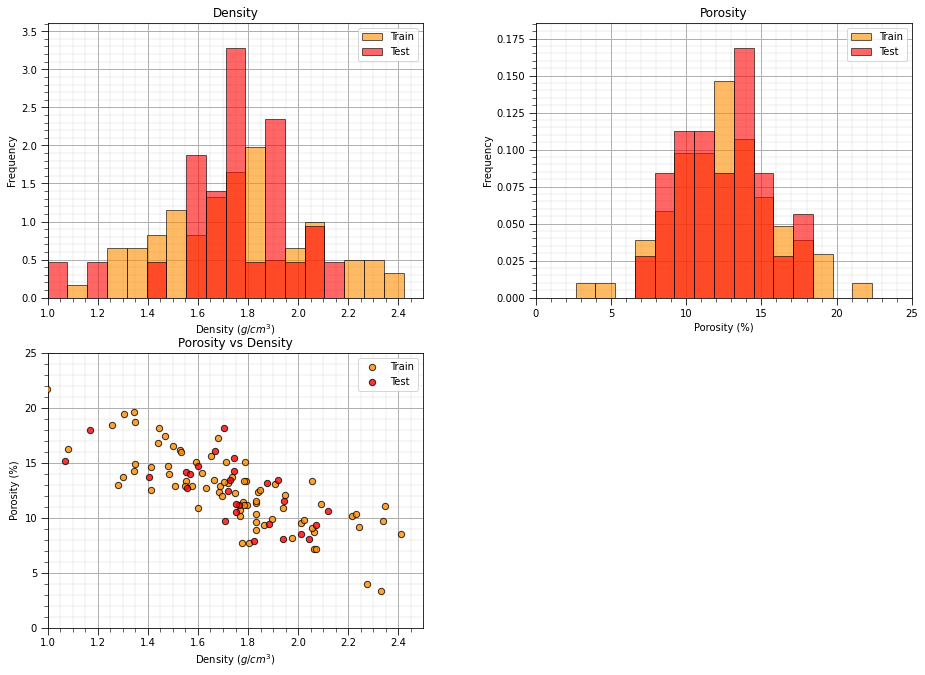

In [8]:
nbins = 20                                                    # number of histogram bins

plt.subplot(221)
freq1,_,_ = plt.hist(x=df_train[xname],weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=True,label='Train')
freq2,_,_ = plt.hist(x=df_test[xname],weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=True,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(xname + ' (' + xunit + ')'); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Density'); add_grid()  
plt.xlim([xmin,xmax]); plt.legend(loc='upper right')   

plt.subplot(222)
freq1,_,_ = plt.hist(x=df_train[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=True,label='Train')
freq2,_,_ = plt.hist(x=df_test[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=True,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(yname + ' (' + yunit + ')'); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Porosity'); add_grid()  
plt.xlim([ymin,ymax]); plt.legend(loc='upper right')   

plt.subplot(223)                                              # plot the model
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.title('Porosity vs Density')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

#### Linear Regression Model

Let's first calculate the linear regression model. We use scikit learn and then extend the same workflow to ridge regression.

* we are building a model, $\phi = f(\rho)$, where $\phi$ is porosity and $\rho$ is density.
* we could also say, we have "porosity regressed on density".

Our model has this specific equation,

$$
\phi = b_1 \times \rho + b_0
$$

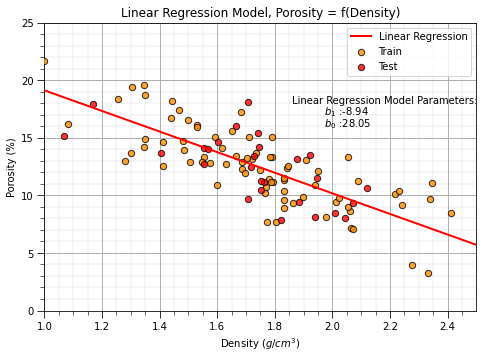

In [9]:
linear_reg = linear_model.LinearRegression()                  # instantiate the model

linear_reg.fit(df_train[xname].values.reshape(len(df_train),1), df_train[yname]) # train the model parameters
x_model = np.linspace(xmin,xmax,10)
y_model_linear = linear_reg.predict(x_model.reshape(-1, 1))   # predict at the withheld test data 

plt.subplot(111)                                              # plot the data, model with model parameters
plt.plot(x_model,y_model_linear, color='red', linewidth=2,label='Linear Regression',zorder=100)
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.annotate('Linear Regression Model Parameters:',[1.86,18]) # add the model to the plot
plt.annotate(r'$b_1$ :' + str(np.round(linear_reg.coef_ [0],2)),[1.97,17])
plt.annotate(r'$b_0$ :' + str(np.round(linear_reg.intercept_,2)),[1.97,16])
plt.title('Linear Regression Model, Porosity = f(Density)')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

You may have noticed the additional reshape operation applied to the predictor feature in the predict function.

````python
y_linear_model = linear_reg.predict(x_model.reshape(-1, 1))   # predict at the withheld test data 
````
This is needed because scikit-learn assumes more than one predictor feature; therefore, expects a 2D array of samples (rows) and features (columns), but we have only a 1D vector.

* the reshape operation turns the 1D vector into a 2D vector with only 1 column

#### Linear Regression Model Checks

Let's run some quick model checks.  Much more could be done, but I limit this for brevity here. 

* see the Linear Regression chapter for more information and checks

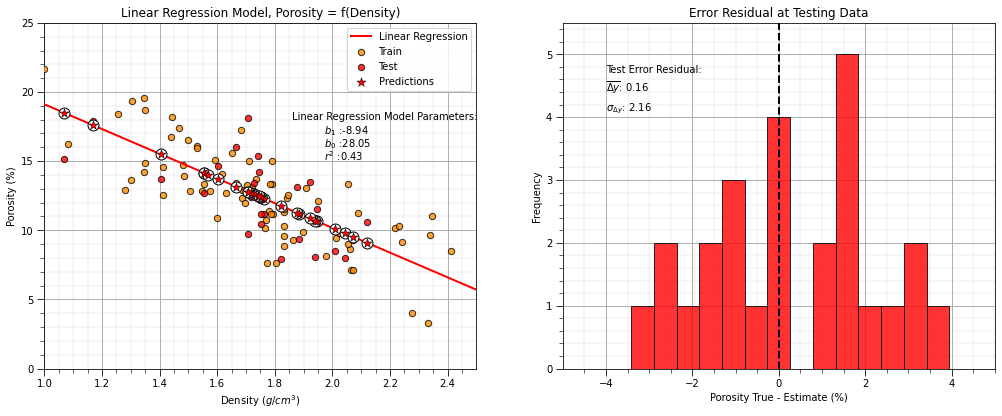

In [10]:
y_pred_linear = linear_reg.predict(df_test[xname].values.reshape(len(df_test),1)) # predict at test data
r_squared_linear = metrics.r2_score(df_test[yname].values, y_pred_linear)

plt.subplot(121)                                              # plot testing diagnostics 
plt.plot(x_model,y_model_linear, color='red', linewidth=2,label='Linear Regression',zorder=100)
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
# plt.scatter(df_test[xname], y_pred,color='grey',edgecolor='black',s = 40, alpha = 1.0, label = 'predictions',zorder=100)
plt.scatter(df_test[xname], y_pred_linear,color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=300)
plt.scatter(df_test[xname], y_pred_linear,color='red',s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=320,label='Predictions')

plt.annotate('Linear Regression Model Parameters:',[1.86,18]) # add the model to the plot
plt.annotate(r'$b_1$ :' + str(np.round(linear_reg.coef_ [0],2)),[1.97,17])
plt.annotate(r'$b_0$ :' + str(np.round(linear_reg.intercept_,2)),[1.97,16])
plt.annotate(r'$r^2$ :' + str(np.round(r_squared_linear,2)),[1.97,15])
plt.title('Linear Regression Model, Porosity = f(Density)')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

y_res_linear = y_pred_linear - df_test['Porosity'].values     # calculate the test residual

plt.subplot(122)
plt.hist(y_res_linear, color = 'red', alpha = 0.8, edgecolor = 'black', bins = np.linspace(-5,5,20))
plt.title("Error Residual at Testing Data"); plt.xlabel(yname + ' True - Estimate (%)');plt.ylabel('Frequency')
plt.vlines(0,0,5.5,color='black',ls='--',lw=2)
plt.annotate('Test Error Residual:',[-4,4.7]) # add residual summary statistics
plt.annotate(r'$\overline{\Delta{y}}$: ' + str(round(np.average(y_res_linear),2)),[-4,4.4])
plt.annotate(r'$\sigma_{\Delta{y}}$: ' + str(np.round(np.std(y_res_linear),2)),[-4,4.1])
add_grid(); plt.xlim(-5,5); plt.ylim(0,5.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.2, hspace=0.2); plt.show()

#### Ridge Regression Model

Let's replace the scikit-learn linear regression method with the scikit-learn ridge regression method.

* note, we must now set the $\lambda$ hyperparameter.
* in scikit-learn the hyperparameter(s) is(are) set with the instantiation of the model

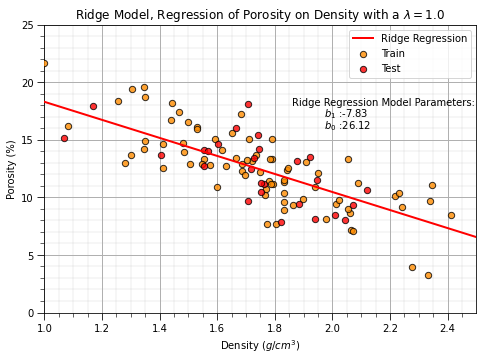

In [11]:
lam = 1.0                                                     # lambda hyperparameter

ridge_reg = Ridge(alpha=lam)                                  # instantiate the model

ridge_reg.fit(df_train[xname].values.reshape(len(df_train),1), df_train[yname]) # train the model parameters
x_model = np.linspace(xmin,xmax,10)
y_model_ridge = ridge_reg.predict(x_model.reshape(10,1)) # predict with the fit model

plt.subplot(111)                                              # plot the data, model with model parameters
plt.plot(x_model,y_model_ridge, color='red', linewidth=2,label='Ridge Regression',zorder=100)
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.annotate('Ridge Regression Model Parameters:',[1.86,18]) # add the model to the plot
plt.annotate(r'$b_1$ :' + str(np.round(ridge_reg.coef_ [0],2)),[1.97,17])
plt.annotate(r'$b_0$ :' + str(np.round(ridge_reg.intercept_,2)),[1.97,16])
plt.title('Ridge Model, Regression of ' + yname + ' on ' + xname + r' with a $\lambda = $' + str(lam))
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Let's repeat the simple model checks that we applied with our linear regression model.

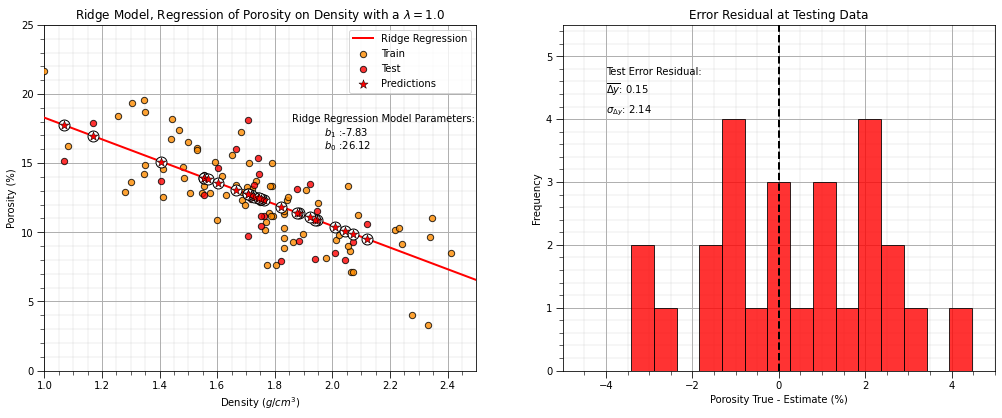

In [12]:
y_pred_ridge = ridge_reg.predict(df_test[xname].values.reshape(len(df_test),1)) # predict at test data
r_squared = metrics.r2_score(df_test[yname].values, y_pred_ridge)

plt.subplot(121)                                              # plot testing diagnostics 
plt.plot(x_model,y_model_ridge, color='red', linewidth=2,label='Ridge Regression',zorder=100)
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.scatter(df_test[xname], y_pred_ridge,color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=300)
plt.scatter(df_test[xname], y_pred_ridge,color='red',s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=320,label='Predictions')

plt.annotate('Ridge Regression Model Parameters:',[1.86,18]) # add the model to the plot
plt.annotate(r'$b_1$ :' + str(np.round(ridge_reg.coef_ [0],2)),[1.97,17])
plt.annotate(r'$b_0$ :' + str(np.round(ridge_reg.intercept_,2)),[1.97,16])
plt.title('Ridge Model, Regression of ' + yname + ' on ' + xname + r' with a $\lambda = $' + str(lam))
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

y_res_ridge = y_pred_ridge - df_test['Porosity'].values       # calculate the test residual

plt.subplot(122)
plt.hist(y_res_ridge, color = 'red', alpha = 0.8, edgecolor = 'black', bins = np.linspace(-5,5,20))
plt.title("Error Residual at Testing Data"); plt.xlabel(yname + ' True - Estimate (%)');plt.ylabel('Frequency')
plt.vlines(0,0,5.5,color='black',ls='--',lw=2)
plt.annotate('Test Error Residual:',[-4,4.7]) # add residual summary statistics
plt.annotate(r'$\overline{\Delta{y}}$: ' + str(round(np.average(y_res_ridge),2)),[-4,4.4])
plt.annotate(r'$\sigma_{\Delta{y}}$: ' + str(np.round(np.std(y_res_ridge),2)),[-4,4.1])
add_grid(); plt.xlim(-5,5); plt.ylim(0,5.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.2, hspace=0.2); plt.show()

Interesting, we explained less variance and have a larger residual standard deviation (more error).

* ridge regression for our arbitrarily selected hyperparameter, $\lambda$, actually reduced both testing variance explained and accuracy 
* this is not surprising, we are not actually tuning the hyperparameter to get the best model!

#### LASSO Regression Model

Let's replace the scikit learn linear regression and ridge regression methods with the scikit learn the LASSO regression method.  Note, once again must now set the lambda hyperparameter.

* recall, the lambda hyperparameter $\lambda$ is set with the instantiation of the model

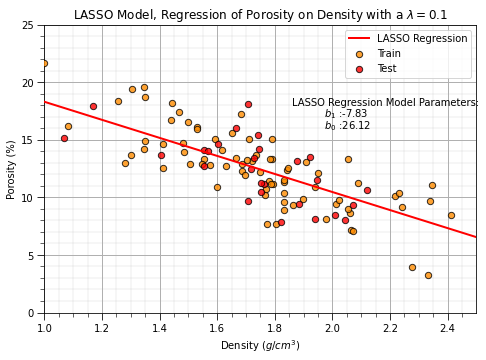

In [13]:
lam = 0.1                                                     # lambda hyperparameter

lasso_reg = Lasso(alpha=lam)                                  # instantiate the model

lasso_reg.fit(df_train[xname].values.reshape(len(df_train),1), df_train[yname]) # train the model parameters
x_model = np.linspace(xmin,xmax,10)
y_model_lasso = lasso_reg.predict(x_model.reshape(10,1))      # predict with the fit model

plt.subplot(111)                                              # plot the data, model with model parameters
plt.plot(x_model,y_model_lasso, color='red', linewidth=2,label='LASSO Regression',zorder=100)
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.annotate('LASSO Regression Model Parameters:',[1.86,18]) # add the model to the plot
plt.annotate(r'$b_1$ :' + str(np.round(lasso_reg.coef_ [0],2)),[1.97,17])
plt.annotate(r'$b_0$ :' + str(np.round(lasso_reg.intercept_,2)),[1.97,16])
plt.title('LASSO Model, Regression of ' + yname + ' on ' + xname + r' with a $\lambda = $' + str(lam))
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Let's repeat the simple model checks that we applied with our linear regression model.

#### LASSO Hyperparameter Tuning

Above we just selected an arbitrary $\lambda$ hyperparameter, now let's do hyperparameter tuning. 

* summarize MSE over k-folds in cross validation while looping over a wide variety of $\lambda$ values

Recall, Mean Squared Error (MSE) is given by,

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where $y_i$ is the actual value, $\hat{y}_i$ is the predicted value, and $n$ is the number of data points.

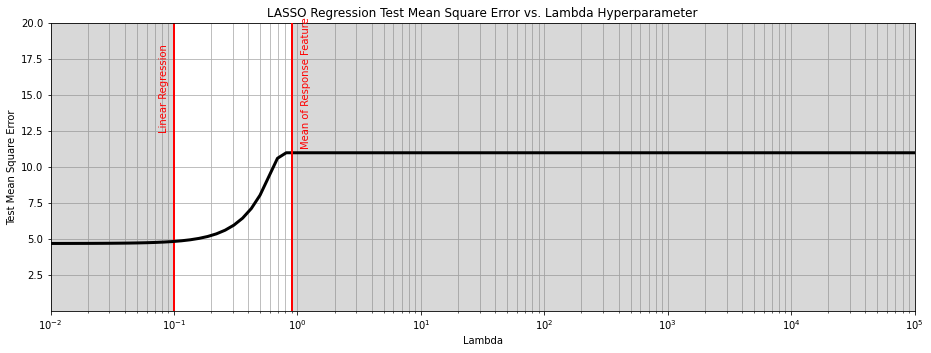

In [14]:
score = []                                                    # code modified from StackOverFlow by Dimosthenis

nlambda = 100
lambda_mat = np.logspace(-2,5,nlambda)
for ilam in range(0,nlambda):
    lasso_reg = Lasso(alpha=lambda_mat[ilam])
    scores = cross_val_score(estimator=lasso_reg, X= df['Density'].values.reshape(-1, 1), 
                             y=df['Porosity'].values, cv=10, n_jobs=4, scoring = "neg_mean_squared_error") # Perform 10-fold cross validation
    score.append(abs(scores.mean()))

plt.subplot(111)
plt.plot(lambda_mat, score,  color='black', linewidth = 3, label = 'Test MSA',zorder=10)
plt.title('LASSO Regression Test Mean Square Error vs. Lambda Hyperparameter'); plt.xlabel('Lambda'); plt.ylabel('Test Mean Square Error')
plt.xlim(1.0e-2,1.0e5); plt.ylim(0.001,20.0); plt.xscale('log')
plt.vlines(0.1,0,20,color='red',lw=2); plt.vlines(0.9,0,20,color='red',lw=2,zorder=10)
plt.annotate('Linear Regression',[0.075,12.5],rotation=90.0,color='red',zorder=10)
plt.annotate('Mean of Response Feature',[1.06,11.4],rotation=90.0,color='red',zorder=10)
plt.fill_between([0.01,0.1],[0,0],[20,20],color='grey',alpha=0.3,zorder=1)
plt.fill_between([0.9,100000],[0,0],[20,20],color='grey',alpha=0.3,zorder=1)
plt.grid(which='both')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

From the above we observe that any $\lambda > 0.1$ results in the minimum test mean square error.

* the threshold behavior is due to the fact that below this level of regularization, the model is behaving like linear regression.

Let's now train a model with this hyperparameter on all the data.

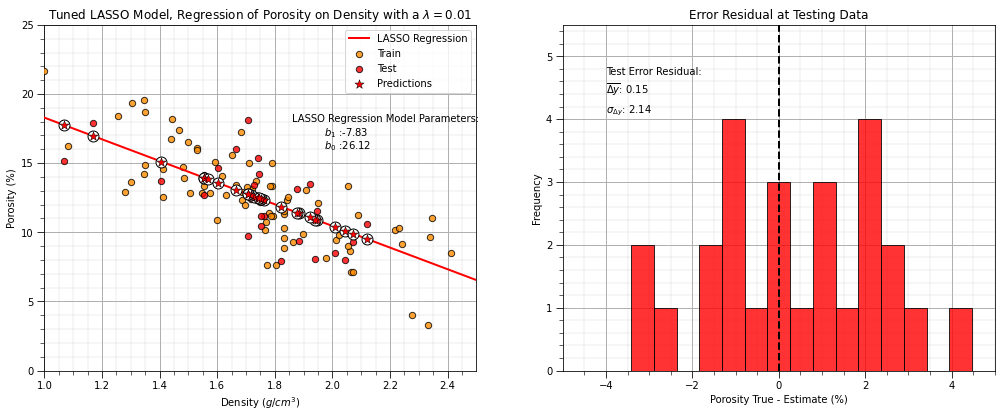

In [15]:
lam = 0.01                                                      # tuned hyperparameter
lasso_tuned = Lasso(alpha=lam)                                  # instantiate the model
lasso_tuned.fit(df[xname].values.reshape(len(df),1), df[yname]) # train the model parameters on all data

y_pred_lasso_tuned = lasso_tuned.predict(df_test[xname].values.reshape(len(df_test),1)) # predict at test data
r_squared = metrics.r2_score(df_test[yname].values, y_pred_lasso_tuned)

plt.subplot(121)                                              # plot testing diagnostics 
plt.plot(x_model,y_model_lasso, color='red', linewidth=2,label='LASSO Regression',zorder=100)
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.scatter(df_test[xname], y_pred_ridge,color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=300)
plt.scatter(df_test[xname], y_pred_ridge,color='red',s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=320,label='Predictions')

plt.annotate('LASSO Regression Model Parameters:',[1.86,18]) # add the model to the plot
plt.annotate(r'$b_1$ :' + str(np.round(ridge_reg.coef_ [0],2)),[1.97,17])
plt.annotate(r'$b_0$ :' + str(np.round(ridge_reg.intercept_,2)),[1.97,16])
plt.title('Tuned LASSO Model, Regression of ' + yname + ' on ' + xname + r' with a $\lambda = $' + str(lam))
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

y_res_ridge = y_pred_ridge - df_test['Porosity'].values       # calculate the test residual

plt.subplot(122)
plt.hist(y_res_ridge, color = 'red', alpha = 0.8, edgecolor = 'black', bins = np.linspace(-5,5,20))
plt.title("Error Residual at Testing Data"); plt.xlabel(yname + ' True - Estimate (%)');plt.ylabel('Frequency')
plt.vlines(0,0,5.5,color='black',ls='--',lw=2)
plt.annotate('Test Error Residual:',[-4,4.7]) # add residual summary statistics
plt.annotate(r'$\overline{\Delta{y}}$: ' + str(round(np.average(y_res_ridge),2)),[-4,4.4])
plt.annotate(r'$\sigma_{\Delta{y}}$: ' + str(np.round(np.std(y_res_ridge),2)),[-4,4.1])
add_grid(); plt.xlim(-5,5); plt.ylim(0,5.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.2, hspace=0.2); plt.show()

With our tuned $\lambda$ hyperparameter,

```python
lam = 0.01
```

our model is the same as linear regression. 

* could we create a situation where the best model is not linear regression? I.e., were regularization is helpful?
* yes, we can. Let's remove most the samples to create data paucity and add a lot of noise!

Admittedly, I iterated the random seeds for the sample and noise to get this result. 

* few data (low $n$) and high dimensionality (high $m$) will generally result in LASSO outperforming linear regression

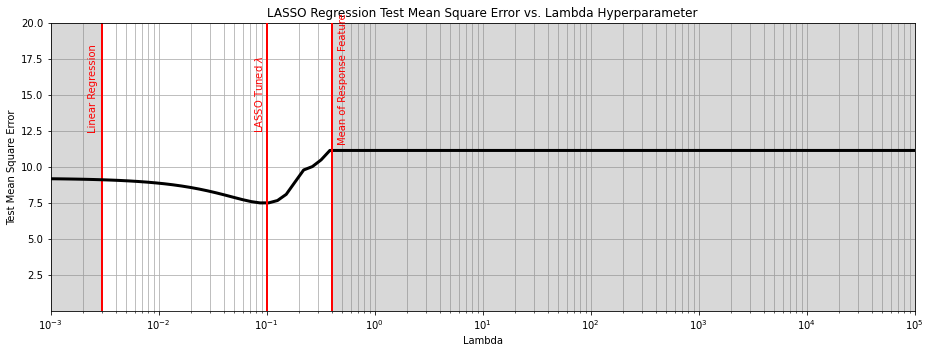

In [16]:
df_sample = df.copy(deep=True).sample(n=10,random_state=11)
noise_stdev = 3.0
np.random.seed(seed=15)
df_sample['Porosity'] = df_sample['Porosity'] + np.random.normal(0.0, noise_stdev, size=len(df_sample))

score = []                                                    # code modified from StackOverFlow by Dimosthenis

nlambda = 100
lambda_mat = np.logspace(-3,5,nlambda)
for ilam in range(0,nlambda):
    lasso_reg = Lasso(alpha=lambda_mat[ilam])
    scores = cross_val_score(estimator=lasso_reg, X= df_sample['Density'].values.reshape(-1, 1), 
                             y=df_sample['Porosity'].values, cv=2, n_jobs=4, scoring = "neg_mean_squared_error") # Perform 10-fold cross validation
    score.append(abs(scores.mean()))

plt.subplot(111)
plt.plot(lambda_mat, score,  color='black', linewidth = 3, label = 'Test MSA',zorder=10)
plt.title('LASSO Regression Test Mean Square Error vs. Lambda Hyperparameter'); plt.xlabel('Lambda'); plt.ylabel('Test Mean Square Error')
plt.xlim(1.0e-3,1.0e5); plt.ylim(0.001,20.0); 
plt.xscale('log')
plt.vlines(0.003,0,20,color='red',lw=2); plt.vlines(0.4,0,20,color='red',lw=2,zorder=10); plt.vlines(0.1,0,20,color='red',lw=2,zorder=10);
plt.annotate('Linear Regression',[0.0022,12.5],rotation=90.0,color='red',zorder=10)
plt.annotate(r'LASSO Tuned $\lambda$',[0.075,12.5],rotation=90.0,color='red',zorder=10)
plt.annotate('Mean of Response Feature',[0.46,11.7],rotation=90.0,color='red',zorder=10)
plt.fill_between([0.001,0.003],[0,0],[20,20],color='grey',alpha=0.3,zorder=1)
plt.fill_between([0.4,100000],[0,0],[20,20],color='grey',alpha=0.3,zorder=1)
plt.grid(which='both')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Investigating the Impact of Lambda Hyperparameter on Model Parameters

Let's look at the multivariate dataset that we already loaded. This way we can observe the model behavior over a range of features, for a range of lambda hyperparameter values. We are going to perform regular steps to get to the punch line!

* load a multivariate dataset
* calculate summary statistics
* standardize the features

Then we will vary the hyperparameter and observe the model parameters.

##### Load a Multivariate Dataset

Let's load a dataset with more variables to demonstrate feature ranking with LASSO regression and to compare the behavior in the model parameters over hyperparameter values. The dataset 'unconv_MV_v5.csv', is a comma delimited file based on 1,000 unconventional wells including the features,

* well average porosity
* log transform of permeability (to linearize the relationships with other variables)
* acoustic impedance (kg/m^3 x m/s x 10^6)
* brittleness ratio (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial production 90 day average (MCFPD).

we assume initial production is the response feature and all other features are predictor features.

Also, you can try another similar dataset by toggling the mv_data integer to 1.

In [17]:
mv_data = 2

if mv_data == 1:
    df_mv = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv")
    df_mv = df_mv.drop('WellIndex',axis = 1)                  # remove the well index feature
elif mv_data == 2:
    df_mv = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv")
    df_mv = df_mv.rename({'Prod':'Production'},axis=1)
    df_mv = df_mv.drop('Well',axis = 1)                       # remove the well index feature
df_mv.head()                                                  # load the comma delimited data file

,Por,Perm,AI,Brittle,TOC,VR,Production
0,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


##### Calculate Summary Statistics

Let's calculate the summary statistics for our multivariate data.

In [18]:
df_mv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.990450,0.481588,-0.190000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Production,200.0,4311.219852,992.038414,2107.139414,3618.064513,4284.687348,5086.089761,6662.622385


##### Standardize the Features

Let's standardize the feature to have:

* mean = 0.0
* variance = standard deviation = 1.0

We do this so the model parameters will similar ranges and will be comparable, i.e., like $\beta$ vs. $B$ coefficients for feature ranking. 

To do this we:

1. instantiate the StandardScaler from scikit learn. We assign it as 'scaler' so we can use it to conveniently reverse the transformation if we like. We will need to do that to get our predictions back into regular production units.

```python
scaler = StandardScaler()
```

2. we then extract all the values from our DataFrame and apply the by-column standardization.  The result is a 2D ndarray

```python
sfeatures = scaler.fit_transform(df_mv.values)
```
3. we make an new empty DataFrame

```python
df_nmv = pd.DataFrame()
```

4. then we add the transformed value to the new DataFrame while keeping the sample index and feature names from the old DataFramae

```python
df_nmv = pd.DataFrame(sfeatures, index=df_mv.index, columns=df_mv.columns)
```


In [19]:
scaler = StandardScaler()                                     # instantiate the scaler 

sfeatures = scaler.fit_transform(df_mv.values)                # standardize all the values extracted from the DataFrame 
df_nmv = pd.DataFrame()                                       # instantiate a new DataFrame
df_nmv = pd.DataFrame(sfeatures, index=df_mv.index, columns=df_mv.columns) # copy the standardized values into the new DataFrame
df_nmv.head()                                                 # preview the new DataFrame

,Por,Perm,AI,Brittle,TOC,VR,Production
0,-0.982256,-0.817030,-0.298603,2.358297,0.352948,1.152048,-0.147565
1,-0.881032,-0.463751,0.444147,-0.141332,-0.209104,-0.280931,-0.757991
2,-0.327677,-1.008148,1.841224,1.748113,-0.209104,2.518377,-0.027155
3,0.903875,1.401098,-0.599240,-0.592585,0.186414,-0.280931,0.795773
4,0.853263,0.138561,0.373409,-2.640962,1.081534,-0.214280,-0.914640


##### Check Summary Statistics

Let's check the summary statistics.

In [20]:
df_nmv.describe().transpose()                                 # summary statistics from the new DataFrame

,count,mean,std,min,25%,50%,75%,max
Por,200.0,2.620126e-16,1.002509,-2.848142,-0.701361,0.026605,0.813617,2.887855
Perm,200.0,-5.662137e-17,1.002509,-1.853701,-0.699753,-0.171282,0.554098,3.208033
AI,200.0,3.985701e-16,1.002509,-2.986650,-0.745137,-0.024493,0.665203,2.937664
Brittle,200.0,1.824929e-16,1.002509,-2.640962,-0.738391,0.095646,0.716652,2.566186
TOC,200.0,3.552714e-16,1.002509,-2.457313,-0.776361,0.082330,0.748466,2.476256
VR,200.0,9.126033e-16,1.002509,-3.446814,-0.647507,-0.014330,0.593853,3.018254
Production,200.0,1.709743e-16,1.002509,-2.227345,-0.700472,-0.026813,0.783049,2.376222


Success, we have all features standardized.  We are ready to build our model.  Let's extract training and testing datasets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_nmv.iloc[:,:6], pd.DataFrame({'Production':df_nmv['Production']}), 
                                                    test_size=0.33, random_state=73073)
print('Number of training data = ' + str(len(X_train)) + ' and number of testing data = ' + str(len(X_test)))

Number of training data = 134 and number of testing data = 66


##### Vary the Hyperparameter and Observe the Model Parameters

Now let's observe the model coefficients ($b_{\alpha}, \alpha = 1,\ldots,m$) for a range of $\lambda$ hyperparameter values.

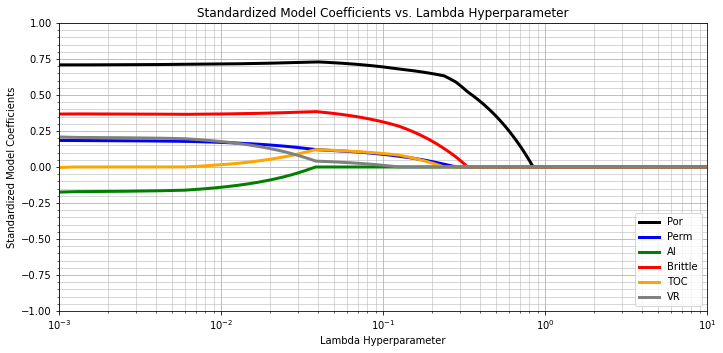

In [22]:
nbins = 1000                                                # number of bins to explore the hyperparameter 
df_nmv.describe().transpose()                               # summary statistics from the new DataFrame                        
lams = np.logspace(-3,1,nbins)                              # make a list of lambda values
coefs = np.ndarray((nbins,6))

index = 0
for lam in lams:
    lasso_reg = Lasso(alpha=lam)                            # instantiate the model
    lasso_reg.fit(X_train, y_train)                         # fit model
    coefs[index,:] = lasso_reg.coef_                        # retrieve the coefficients
    index = index + 1
    
color = ['black','blue','green','red','orange','grey']
plt.subplot(111)                                            # plot the results
for ifeature in range(0,6):
    plt.semilogx(lams,coefs[:,ifeature], label = df_mv.columns[ifeature], c = color[ifeature], linewidth = 3.0)

plt.title('Standardized Model Coefficients vs. Lambda Hyperparameter'); plt.xlabel('Lambda Hyperparameter'); plt.ylabel('Standardized Model Coefficients')
plt.xlim(1.0e-3,1.0e1); plt.ylim(-1.0,1.0); plt.grid(); plt.legend(loc = 'lower right')
plt.grid(True); plt.minorticks_on(); plt.grid(which='minor', linewidth=0.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1., wspace=0.2, hspace=0.2); plt.show()

What do we see?

* for a very low lambda value, all features are included 
* as we increase the lambda hyperparameter, total organic carbon is the first predictor feature to be removed
* then acoustic impedance, vitrinite reflectance, brittleness, log perm and finally porosity.
* at $\lambda \ge 0.8$ all features are removed.

Let's repeat this workflow with ridge regression for a comparison.

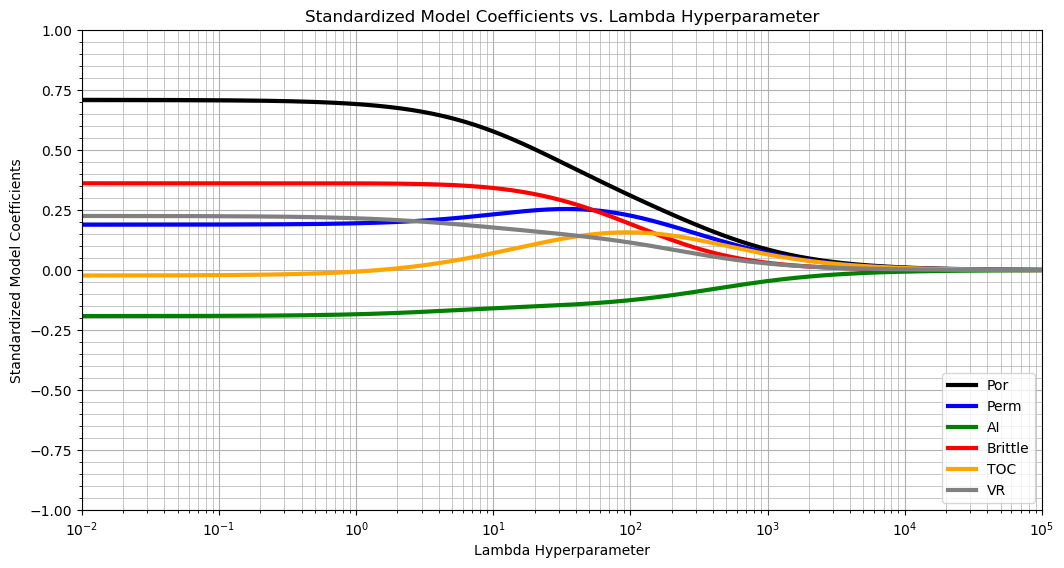

In [69]:
nbins = 1000                                                # number of bins to explore the hyperparameter 
lams = np.logspace(-2,5,nbins)       
ridge_coefs = np.ndarray((nbins,6))

index = 0
for lam in lams:
    ridge_reg = Ridge(alpha=lam)
    ridge_reg.fit(X_train, y_train) # fit model
    ridge_coefs[index,:] = ridge_reg.coef_
    index = index + 1
    
color = ['black','blue','green','red','orange','grey']
plt.subplot(111)
for ifeature in range(0,6):
    plt.semilogx(lams,ridge_coefs[:,ifeature], label = df_mv.columns[ifeature], c = color[ifeature], linewidth = 3.0)

plt.title('Standardized Model Coefficients vs. Lambda Hyperparameter'); plt.xlabel('Lambda Hyperparameter'); plt.ylabel('Standardized Model Coefficients')
plt.xlim(1.0e-2,1.0e5); plt.ylim(-1.0,1.0); plt.legend(loc = 'lower right')
plt.grid(True); plt.minorticks_on(); plt.grid(which='minor', linewidth=0.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1., wspace=0.2, hspace=0.2); plt.show()

Ridge regression is quite different in the response of predictor feature to change in the $\lambda$ hyperparameter.

* there is no selective removal of predictor features as the $\lambda$ hyperparameter increases

* a major component is uniform shrinkage of all coefficients towards zero for $\lambda \in [10^1, 10^5]$

#### Demonstrate Solution Instability

Let's repeat the above experiement and track some of the estimates from the model over the hyperparameter, $\lambda$.

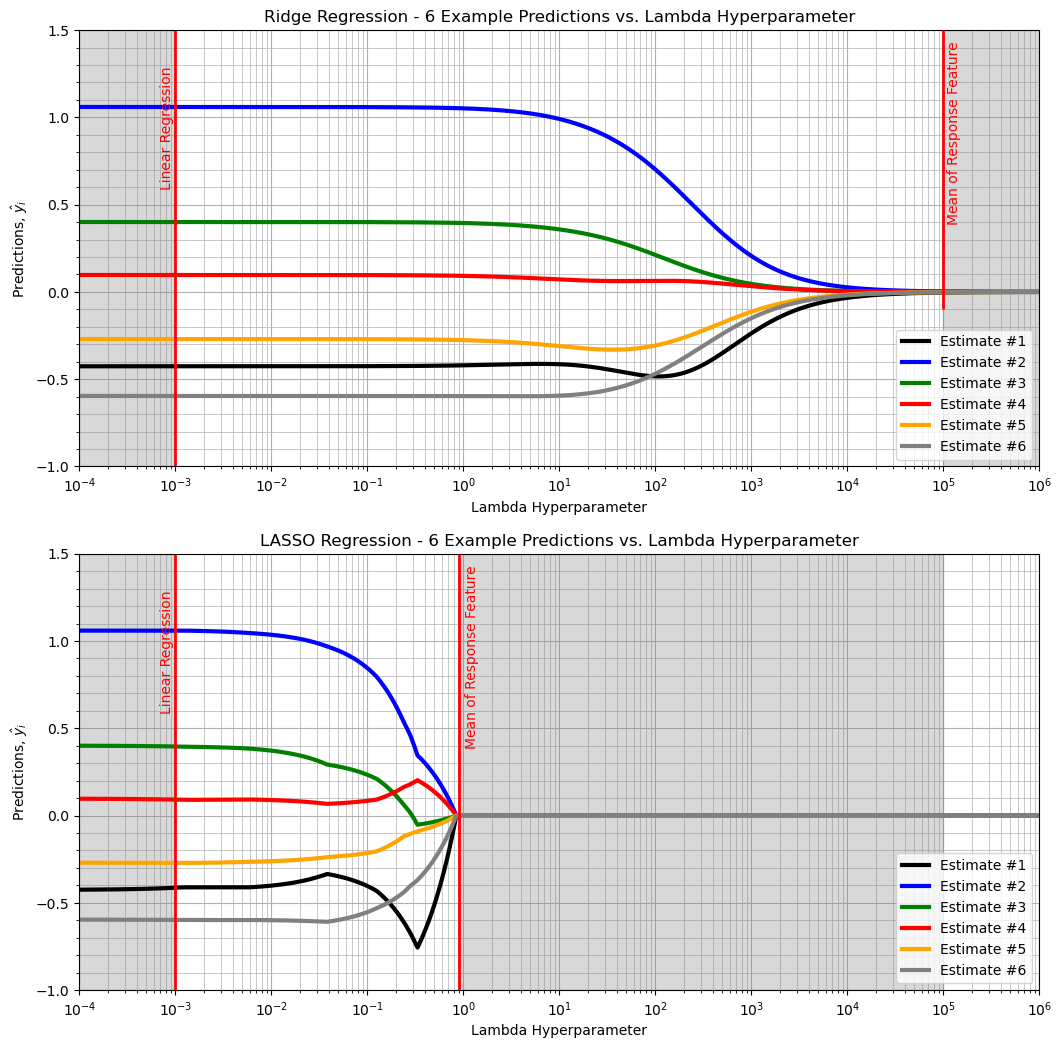

In [174]:
nbins = 1000                                                # number of bins to explore the hyperparameter 
df_nmv.describe().transpose()                               # summary statistics from the new DataFrame                        
lams = np.logspace(-4,6,nbins)                              # make a list of lambda values
coefs = np.ndarray((nbins,6))
estimates_ridge = np.zeros((nbins,len(X_test)))
estimates_lasso = np.zeros((nbins,len(X_test)))

index = 0
for lam in lams:
    lasso_reg = Lasso(alpha=lam)                            # instantiate the model
    lasso_reg.fit(X_train, y_train)                         # fit model
    ridge_reg = Ridge(alpha=lam)
    ridge_reg.fit(X_train, y_train) # fit model
    estimates_ridge[index] = ridge_reg.predict(X_test).flatten() # predict at test data
    estimates_lasso[index] = lasso_reg.predict(X_test).flatten() # predict at test data
    index = index + 1
    
color = ['black','blue','green','red','orange','grey']
plt.subplot(211)                                            # plot the results
for iest in range(0,6):
    plt.semilogx(lams,estimates_ridge[:,iest], label = 'Estimate #' + str(iest+1), c = color[iest], linewidth = 3.0)
plt.title('Ridge Regression - 6 Example Predictions vs. Lambda Hyperparameter'); plt.xlabel('Lambda Hyperparameter'); 
plt.ylabel(r'Predictions, $\hat{y}_i$')
plt.xlim(1.0e-4,1.0e6); plt.ylim(-1.0,1.5); plt.grid(); plt.legend(loc = 'lower right')
plt.grid(True); plt.minorticks_on(); plt.grid(which='minor', linewidth=0.5)
plt.vlines(0.001,-1,1.5,color='red',lw=2); plt.vlines(1.0e5,-0.1,1.5,color='red',lw=2,zorder=10)
plt.annotate('Linear Regression',[0.0007,0.6],rotation=90.0,color='red',zorder=10)
plt.annotate('Mean of Response Feature',[110000,0.4],rotation=90.0,color='red',zorder=10)
plt.fill_between([0.0001,0.001],[-1,-1],[1.5,1.5],color='grey',alpha=0.3,zorder=1)
plt.fill_between([1.0e5,1.0e7],[-1,-1],[1.5,1.5],color='grey',alpha=0.3,zorder=1)

plt.subplot(212)                                            # plot the results
for iest in range(0,6):
    plt.semilogx(lams,estimates_lasso[:,iest], label = 'Estimate #' + str(iest+1), c = color[iest], linewidth = 3.0)
plt.title('LASSO Regression - 6 Example Predictions vs. Lambda Hyperparameter'); plt.xlabel('Lambda Hyperparameter'); 
plt.ylabel(r'Predictions, $\hat{y}_i$')
plt.xlim(1.0e-4,1.0e6); plt.ylim(-1.0,1.5); plt.grid(); plt.legend(loc = 'lower right')
plt.grid(True); plt.minorticks_on(); plt.grid(which='minor', linewidth=0.5)
plt.vlines(0.001,-1,1.5,color='red',lw=2); plt.vlines(0.90,-1.0,1.5,color='red',lw=2,zorder=10)
plt.annotate('Linear Regression',[0.0007,0.6],rotation=90.0,color='red',zorder=10)
plt.annotate('Mean of Response Feature',[1.05,0.4],rotation=90.0,color='red',zorder=10)
plt.fill_between([0.0001,0.001],[-1,-1],[1.5,1.5],color='grey',alpha=0.3,zorder=1)
plt.fill_between([0.9,100000],[-1,-1],[1.5,1.5],color='grey',alpha=0.3,zorder=1)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=2.0, wspace=0.2, hspace=0.2); plt.show()

* ridge regression estimates smoothly vary from linear regression to the global mean of the response feature (stability)

* LASSO regression estimates demonstrate jumps (instability)

#### Comments

This was a basic treatment of LASSO regression. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
